In [4]:
#initialization
!pip install qiskit ipywidgets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

     |████████████████████████████████| 6.0MB 22.5MB/s 
     |████████████████████████████████| 17.9MB 208kB/s 
     |████████████████████████████████| 204kB 49.5MB/s 
     |████████████████████████████████| 215kB 59.9MB/s 
     |████████████████████████████████| 2.1MB 49.5MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 1.0MB 44.1MB/s 
     |████████████████████████████████| 194kB 57.4MB/s 
     |████████████████████████████████| 81kB 11.7MB/s 
     |████████████████████████████████| 614kB 52.4MB/s 
     |████████████████████████████████| 3.2MB 52.9MB/s 
     |████████████████████████████████| 5.5MB 39.0MB/s 
  Created wheel for qiskit: filename=qiskit-0.25.0-cp37-none-any.whl size=3032 sha256=ce1b83d29971987d6afd2c6aa346bab1724fac31bca8b48b40ef16f31bc30ab7
  Stored in directory: /root/.cache/pip/wheels/09/6e/f1/a7eaab6e3943d749f1b257f462f60fbc402b0c8e870b555169
  Created wheel for python-constraint: filename=python_constraint-1.4.0-p

In [5]:
# This will be required when you want to try the QRNG you build on a real device  
# IBMQ.save_account('YOUR_IBM_TOKEN') # you can find your account id on the IBm Quantum Experience website
                                       # in your profile section
                                       # provider = IBMQ.load_account()
 

In [6]:
q2 = QuantumRegister(1)
c2 = ClassicalRegister(1)
qc2 = QuantumCircuit(q2, c2)
qc2.draw()

q0_0: 
      
c0: 1/

In [7]:
qc2.h(0)
qc2.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
c0: 1/═════

In [8]:

qc2.measure(q2[0], c2[0])
qc2.draw()

┌───┐┌─┐
q0_0: ┤ H ├┤M├
      └───┘└╥┘
c0: 1/══════╩═
            0

In [9]:

# running and getting results 

backend = Aer.get_backend('qasm_simulator')
job = execute(qc2, backend, shots=1)
# backend = provider.get_backend('ibmq_qasm_simulator')
# job = execute(qc, backend=backend, shots=8000, seed_simulator=12345, backend_options={"fusion_enable":True})
result = job.result()
count = result.get_counts()
print(count)

{'0': 1}


In [10]:

q = QuantumRegister(7)
c = ClassicalRegister(4)
qc = QuantumCircuit(q, c)

In [11]:
# initialize in a superposition of all possible states 
qc.x(q[4])
qc.h(q[0:5])
qc.barrier(q)

In [12]:
qc.barrier(q)

# build oracle. ex: to find 1010 state
qc.x(q[1])
qc.x(q[3])
qc.barrier(q)
qc.mct([q[0], q[1], q[2], q[3]], q[4], q[5:7])    # control qubits, target qubit, ancilla qubits = number of control qubits - 2
qc.barrier(q)
qc.x(q[1])
qc.x(q[3])

qc.barrier(q)

In [13]:
qc.measure(q[0:4], c[0:4])

In [14]:
qc.draw()

# in the output drawing

┌───┐      ░  ░       ░       ░       ░ ┌─┐         
q5_0: ┤ H ├──────░──░───────░───■───░───────░─┤M├─────────
      ├───┤      ░  ░ ┌───┐ ░   │   ░ ┌───┐ ░ └╥┘┌─┐      
q5_1: ┤ H ├──────░──░─┤ X ├─░───■───░─┤ X ├─░──╫─┤M├──────
      ├───┤      ░  ░ └───┘ ░   │   ░ └───┘ ░  ║ └╥┘┌─┐   
q5_2: ┤ H ├──────░──░───────░───■───░───────░──╫──╫─┤M├───
      ├───┤      ░  ░ ┌───┐ ░   │   ░ ┌───┐ ░  ║  ║ └╥┘┌─┐
q5_3: ┤ H ├──────░──░─┤ X ├─░───■───░─┤ X ├─░──╫──╫──╫─┤M├
      ├───┤┌───┐ ░  ░ └───┘ ░ ┌─┴─┐ ░ └───┘ ░  ║  ║  ║ └╥┘
q5_4: ┤ X ├┤ H ├─░──░───────░─┤ X ├─░───────░──╫──╫──╫──╫─
      └───┘└───┘ ░  ░       ░ └───┘ ░       ░  ║  ║  ║  ║ 
q5_5: ───────────░──░───────░───────░───────░──╫──╫──╫──╫─
                 ░  ░       ░       ░       ░  ║  ║  ║  ║ 
q5_6: ───────────░──░───────░───────░───────░──╫──╫──╫──╫─
                 ░  ░       ░       ░       ░  ║  ║  ║  ║ 
c1: 4/═════════════════════════════════════════╩══╩══╩══╩═
                                               0  1  2  3

In [15]:

# running and getting results 

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
# backend = provider.get_backend('ibmq_qasm_simulator')
# job = execute(qc, backend=backend, shots=8000, seed_simulator=12345, backend_options={"fusion_enable":True})
result = job.result()
count = result.get_counts()
print(count)

{'0101': 60, '1100': 55, '1001': 64, '1011': 80, '1111': 66, '1010': 45, '0001': 67, '1110': 61, '1000': 62, '0110': 64, '0100': 49, '1101': 62, '0010': 64, '0011': 75, '0111': 69, '0000': 57}


In [16]:
# the code snippet below can be used to retreive your job in case your jupyter notebook loses connection with IBMQ servers before completion of the job

# backend = provider.get_backend('ibmq_qasm_simulator')
# job = backend.retrieve_job('enter your job id here. it can be found in your IBM Q Experience dashboard')
# counts = job.result().get_counts()
# print(counts)

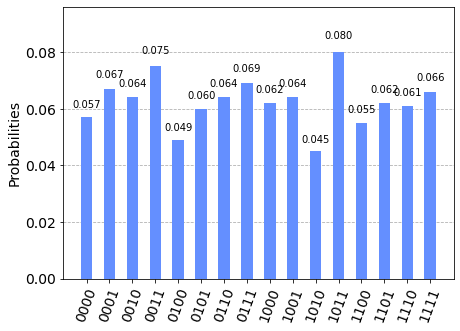

In [17]:
plot_histogram(count)

# the answer may seem inverted, i.e, 0101 is actually state 1010. that's just the notation used by qiskit.